### SA on sentences w/ medication
http://textminingonline.com/dive-into-nltk-part-ix-from-text-classification-to-sentiment-analysis

In [19]:
# Trained with nltk movie_reviews

In [18]:
import nltk
from nltk.corpus import movie_reviews
from random import shuffle
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tknzr = TweetTokenizer()

In [2]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [3]:
documents = [(list(movie_reviews.words(fileid)), category) 
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

In [4]:
shuffle(documents)

In [5]:
print (documents[0])

(['go', "'", 's', 'is', 'a', 'gloriously', 'slick', 'hip', 'machine', '.', 'director', 'liman', '(', 'who', 'also', 'photographed', 'go', ')', 'and', 'screenwriter', 'august', 'celebrate', 'the', 'drug', '/', 'rave', 'scene', 'in', 'l', '.', 'a', '.', ',', 'preferring', 'to', 'take', '(', 'comedic', ')', 'snapshots', 'of', 'troubled', 'youth', 'rather', 'than', 'critique', 'them', '.', 'after', 'more', 'than', 'ninety', 'minutes', 'of', 'pill', '-', 'popping', ',', 'tantric', 'sex', ',', 'car', 'chases', ',', 'and', 'attempted', 'murder', ',', 'go', 'even', 'has', 'a', 'happy', 'ending', '.', 'this', 'is', 'the', 'sort', 'of', 'film', 'that', 'gives', 'members', 'of', 'the', 'dove', 'foundation', 'splitting', 'headaches', ';', 'as', 'go', 'wound', 'down', ',', 'i', 'anticipated', 'an', 'anti', '-', 'pill', '-', 'popping', '-', 'casual', '-', 'tantric', '-', 'sex', '-', 'car', '-', 'chase', '-', 'attempted', '-', 'murder', 'sermon', 'that', '(', 'blessedly', ')', 'didn', "'", 't', 'arri

In [6]:
len(documents)

2000

In [7]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [8]:
# word_features = all_words.keys()[:2000]
word_features = list(all_words.keys())[:2000]

In [9]:
# len(featuresets)

In [10]:
# print (document_features(movie_reviews.words('pos/cv957_8737.txt')))

In [11]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [12]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [13]:
# classifier = nltk.NaiveBayesClassifier.train(train_set)

full_classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [14]:
print (nltk.classify.accuracy(full_classifier, test_set))

0.89


In [15]:
# classifier.show_most_informative_features(10)

### test

In [31]:
df1 = pd.read_csv('depression_s_med.csv')

CParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [19]:
sent_a = list(df1['med_sentence'].values)

In [25]:
sid = SentimentIntensityAnalyzer()

In [20]:
res_s_dic = []
# res_s_dic1 = []

df_res_s = pd.DataFrame([])

sid = SentimentIntensityAnalyzer()

for i, sentence in enumerate(sent_a[:5000]):
    test_set = document_features(tknzr.tokenize(sentence))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_s.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_s.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_s = sid.polarity_scores(sentence)
    df_res_s.loc[i,'neg_vader'] = sid_s['neg']
    df_res_s.loc[i,'neu_vader'] = sid_s['neu']
    df_res_s.loc[i,'pos_vader'] = sid_s['pos']
    
    df_res_s.loc[i,'sentence'] = sentence
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_s['pos_prob'].max())
print(df_res_s['pos_vader'].max())
df_res_s.to_csv('depression_s_med_with_score_first5000.csv')
print (df_res_s)

0.472985339457
0.717
      neg_prob  pos_prob  neg_vader  neu_vader  pos_vader  \
0     0.984976  0.015024      0.000      1.000      0.000   
1     0.999745  0.000255      0.000      1.000      0.000   
2     0.999384  0.000616      0.000      1.000      0.000   
3     0.999981  0.000019      0.000      1.000      0.000   
4     0.996056  0.003944      0.000      1.000      0.000   
5     0.999900  0.000100      0.000      0.878      0.122   
6     0.999735  0.000265      0.000      0.874      0.126   
7     0.999851  0.000149      0.125      0.875      0.000   
8     0.999908  0.000092      0.000      1.000      0.000   
9     0.998154  0.001846      0.000      1.000      0.000   
10    0.999938  0.000062      0.073      0.809      0.118   
11    0.998584  0.001416      0.181      0.713      0.106   
12    0.999157  0.000843      0.000      0.923      0.077   
13    0.999325  0.000675      0.099      0.755      0.145   
14    0.997941  0.002059      0.047      0.866      0.087   
15 

In [22]:
prob_result = full_classifier.prob_classify(document_features(tknzr.tokenize(str('I love it! This is great!!!'))))
print(prob_result.prob("neg"), prob_result.prob("pos"))

0.9999248550133579 7.51449866528843e-05


In [23]:
# df_res_s = pd.DataFrame(res_s_dic)
# print (df_res_s)

# df_res_s.to_csv('s_med_with_score_first100.csv')

In [24]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

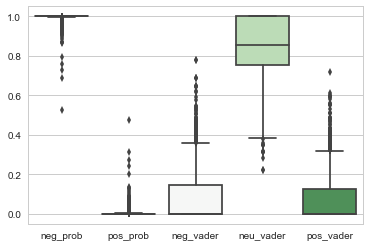

In [25]:
ax = sns.boxplot(data = df_res_s,palette = "PRGn")

#### posts

In [28]:
df2 = pd.read_csv('depression_p_med.csv')

/Users/elenajia/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
post_a = list(df2['selftext'].values)

In [30]:
res_p_dic = []

df_res_p = pd.DataFrame([])


for i, post in enumerate(post_a[:5000]):
    
    test_set = document_features(tknzr.tokenize(str(post)))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_p.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_p.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_p = sid.polarity_scores(str(post))
    df_res_p.loc[i,'neg_vader'] = sid_p['neg']
    df_res_p.loc[i,'neu_vader'] = sid_p['neu']
    df_res_p.loc[i,'pos_vader'] = sid_p['pos']
    
    df_res_p.loc[i,'post'] = post
    
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_p['pos_prob'].max())
print(df_res_p['pos_vader'].max())
df_res_p.to_csv('depression_p_med_with_score_first5000.csv')
print (df_res_p)



0.999999994776
0.471
      neg_prob      pos_prob  neg_vader  neu_vader  pos_vader  \
0     0.871118  1.288823e-01      0.157      0.504      0.339   
1     0.970831  2.916898e-02      0.260      0.740      0.000   
2     0.996289  3.710863e-03      0.168      0.761      0.072   
3     0.978885  2.111483e-02      0.215      0.651      0.134   
4     0.998348  1.652267e-03      0.114      0.679      0.207   
5     0.991406  8.593958e-03      0.127      0.795      0.078   
6     0.927797  7.220297e-02      0.098      0.718      0.184   
7     0.999762  2.384594e-04      0.177      0.691      0.131   
8     0.999141  8.588982e-04      0.172      0.767      0.061   
9     0.934233  6.576657e-02      0.129      0.783      0.089   
10    0.622808  3.771916e-01      0.098      0.755      0.146   
11    0.999997  2.838622e-06      0.156      0.721      0.123   
12    0.985670  1.432988e-02      0.240      0.657      0.104   
13    0.998926  1.073811e-03      0.129      0.721      0.150   
14  

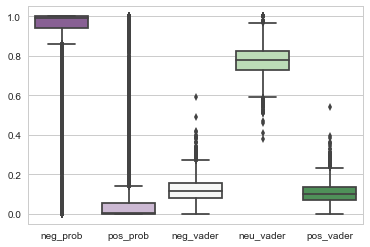

In [29]:
ax_2 = sns.boxplot(data= df_res_p,palette="PRGn")